#  Diabetes 130 US hospitals for years 1999-2008 (Diabetes - readmission)

When a patient who is suffering from Hyperglycemia is admitted to a hospital, he is supposed to be taken good and systematic care. Mismanagement of Hyperglycemia in the hospital can have an adverse effect on a patient's health. Many hospitals have lately started following certain protocols with glucose targets in ICU settings but non ICU patients still lack proper management of their blood sugar.
Evidence suggests that inpatient management is not systematic. Their management can lead to readmission of the patient in hospitals after a certain period of time. So if we know beforehand that this particular patient has a high chance of readmission we can change the treatment to avoid readmission. 
This study uses the Health Facts National Database (Cerner Corporations, Kansas city, MO) gathering extensive clinical records across hundreds of hospitals throughout the US but here we are using just a subset of this database which consists of encounters between some 100,000 diabetes patients and 130 US Hospitals.

Source: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

**All the encounters used for analysis satisfy five key criteria:**

1.	It is a hospital admission.
2.	The inpatient was classified as diabetic (at least one of three initial diagnoses included diabetes).
3.	The length of stay was from 1 to 14 days.
4.	The inpatient underwent laboratory testing.
5.	The inpatient received medication during its stay.

**Readmission can be categorised into three broad categories:**

1.	Planned: Directly prescribed by the healthcare professional. 
2.	Unplanned: Readmission that should not have happened if proper care was taken.
3.	Unavoidable: Highly predictable readmissions due to the nature of the patient’s condition

**So this problem is all about classifying some patients into three classes:**

1.	No readmission
2.	Readmission < 30 days: Very bad situation and highly correlated with the quality of care from the health center.
3.	Readmission > 30 days: This is also bad but has less correlation with the quality of care from the health center and might be due to other external factors.

**Dataset overview (https://www.hindawi.com/journals/bmri/2014/781670/): **
<img src="1.png">
<img src="3.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
df[df['readmitted']=='<30']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
11,36900,77391171,AfricanAmerican,Male,[60-70),?,2,1,4,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
12,40926,85504905,Caucasian,Female,[40-50),?,1,3,7,7,...,No,Down,No,No,No,No,No,Ch,Yes,<30
16,77076,92519352,AfricanAmerican,Male,[50-60),?,1,1,7,4,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
46,486156,86240259,Caucasian,Female,[70-80),?,3,5,4,9,...,No,Down,No,No,No,No,No,Ch,Yes,<30
50,550098,21820806,AfricanAmerican,Male,[50-60),?,2,1,2,4,...,No,No,No,No,No,No,No,No,No,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101699,443168882,71186301,Caucasian,Female,[80-90),?,1,6,7,4,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
101727,443700698,69505299,Caucasian,Female,[70-80),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,<30
101732,443728472,178662695,?,Female,[70-80),?,2,1,1,4,...,No,Steady,Steady,No,No,No,No,Ch,Yes,<30
101746,443797298,89955270,Caucasian,Male,[70-80),?,1,1,7,4,...,No,No,No,No,No,No,No,No,Yes,<30


In [20]:
df.iloc[6]

encounter_id                    55842
patient_nbr                  84259809
race                        Caucasian
gender                           Male
age                           [60-70)
weight                              ?
admission_type_id                   3
discharge_disposition_id            1
admission_source_id                 2
time_in_hospital                    4
payer_code                          ?
medical_specialty                   ?
num_lab_procedures                 70
num_procedures                      1
num_medications                    21
number_outpatient                   0
number_emergency                    0
number_inpatient                    0
diag_1                            414
diag_2                            411
diag_3                            V45
number_diagnoses                    7
max_glu_serum                    None
A1Cresult                        None
metformin                      Steady
repaglinide                        No
nateglinide 

In [3]:
df_id = pd.read_csv('dataset_diabetes/IDs_mapping.csv')
df_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [4]:
df_id[df_id['admission_type_id'] == '4']

,admission_type_id,description
3,4,Newborn
13,4,Discharged/transferred to ICF
45,4,Transfer from a hospital


#### Columns

In [9]:
df.columns.values

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype=object)

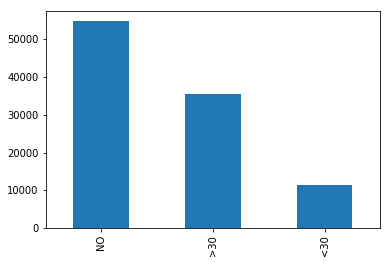

In [18]:
df['readmitted'].value_counts().plot(kind='bar')

#### Let us define this problems as 2 class classification where:
* 0 : readmitted = {NO or >30 days}*
* 1 : readmitted = {<30 days}


In [5]:
def label(x):
    if x=='NO' or x=='>30':
        return 0
    elif x=='<30':
        return 1
df['readmitted'] = df['readmitted'].apply(label)

In [6]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


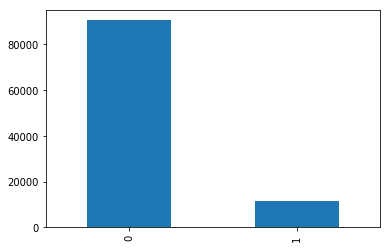

In [15]:
df['readmitted'].value_counts().plot(kind='bar')

#### Now as we can observe, only 11.16 % of total encountered patients got readmitted within 30 days and hence it is an imabalanced dataset

### Let us split the dataframe in 4 parts (df_1,df_2, df_3, df_4):

In [7]:
cols = df.columns.values
df_1 = df[cols[:10]]
df_2 = df[cols[10:20]]
df_3 = df[cols[20:30]]
df_4 = df[cols[30:-1]]

df_1['label'] = df['readmitted']
df_2['label'] = df['readmitted']
df_3['label'] = df['readmitted']
df_4['label'] = df['readmitted']


D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [8]:
df_1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,label
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,0


Text(0.5,1,'Feature correlation 1')

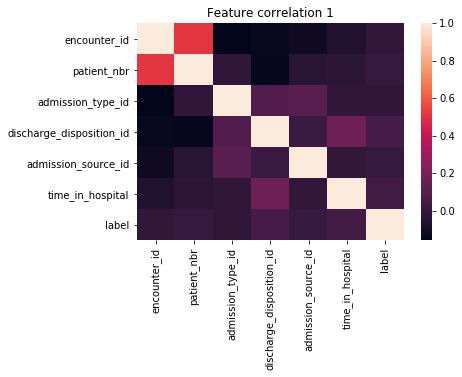

In [9]:
sns.heatmap(df_1.corr())
plt.title('Feature correlation 1')

**Observations:**
1. time_in_hospsital is highly correlated with discharge_disposition_id
2. encounter_id and patient_id are merely a unique identity so we do not care about that.
3. admission_source_id has some correlation with admission_type_id

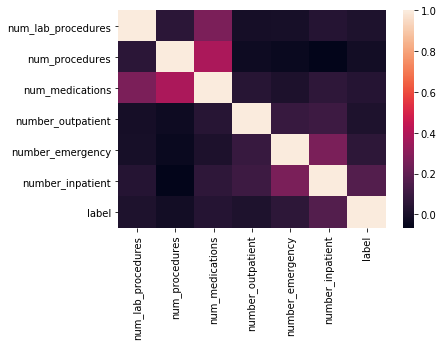

In [26]:
sns.heatmap(df_2.corr())

**Observations :**
    1. num_lab_procedures has good correlation with nu_medication.
    2. num_procedures is highly correlated with num_medication
    3.number_emergency is a little bit correlated with number_inpatient

In [28]:
df_3.head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,label
0,?,1,None,None,No,No,No,No,No,No,0
1,255,9,None,None,No,No,No,No,No,No,0
2,V27,6,None,None,No,No,No,No,No,No,0
3,403,7,None,None,No,No,No,No,No,No,0
4,250,5,None,None,No,No,No,No,No,No,0


In [30]:
df_4.head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,label
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


### Let us drop some features based on missing values:
    

D:\anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


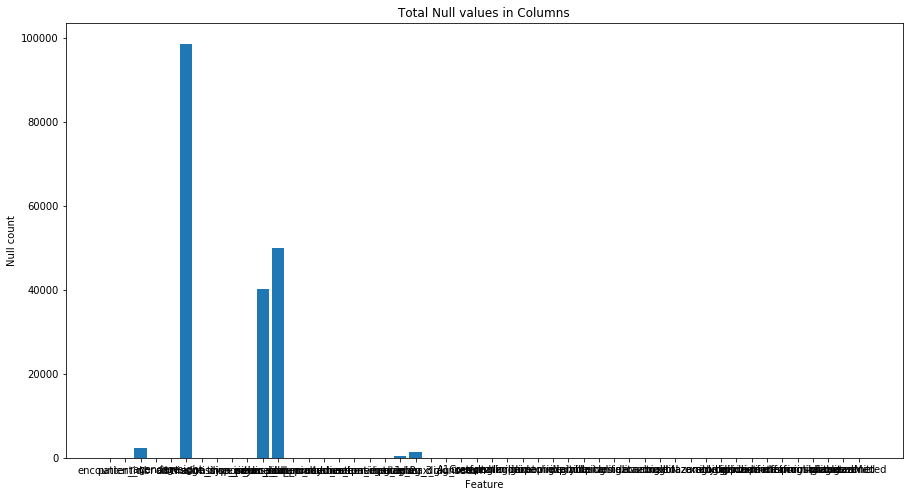

In [10]:
def null_counter(feature):
    val = len(df[df[feature]=='?'][feature])
    return val

def plot_null(df):
    null = []
    for i in range(len(df.columns.values)):
        null.append(null_counter(df.columns.values[i]))
    fig = plt.figure(figsize=(15,8))
    plt.bar(df.columns.values,null,)
    plt.title('Total Null values in Columns')
    plt.xlabel('Feature')
    plt.ylabel('Null count')
    plt.show()
    
plot_null(df)

#### As we can see, there are some features with a lot more missing values but names are not clear in the graph.

In [11]:
def print_null_val(df):
    null = {}
    for i in range(len(df.columns.values)):
        null[df.columns.values[i]] = null_counter(df.columns.values[i])
    return pd.DataFrame.from_dict(null, orient='index')
print(print_null_val(df))

D:\anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


                              0
encounter_id                  0
patient_nbr                   0
race                       2273
gender                        0
age                           0
weight                    98569
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                40256
medical_specialty         49949
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                       21
diag_2                      358
diag_3                     1423
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizid

**Observations:**
1. As we can see 'weight' has almost all the values null ('?'), I will drop this column.
2. medical_speciality and payer_codes have also a lot of null values but still we have more than 50% of values so we will see them later.

In [12]:
df = df.drop('weight',axis=1)
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766

In [13]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.111599
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.314874
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


## Univariate Analysis

In [197]:
#this function returns a dataframe that contains the perccentage of each category of a particular feature that got readmitted
def category_ratio(feature):
    dic = {}
    for x in df[feature].unique():
        num = len(df[(df[feature]==x) & (df['readmitted']==1)])
        den = len(df[df[feature]==x])
        dic[x] = (num/den)*100
    data = pd.DataFrame.from_dict(dic,orient='index',columns=['%age belonging to class 1'])
    return data.sort_values(by=['%age belonging to class 1'], ascending=False)

# this function return a dataframe with total observations for each category within a feature
def val_counts(df, feature):
    dic = {}
    for x in df[feature].unique():
        dic[x] = [len(df[df[feature]==x]) , (len(df[df[feature]==x])/len(df))*100]
    data = pd.DataFrame.from_dict(dic,orient='index', columns=['Total observations','%age of total data'])
    return data.sort_values(by=['Total observations'], ascending=False)

### 'gender'

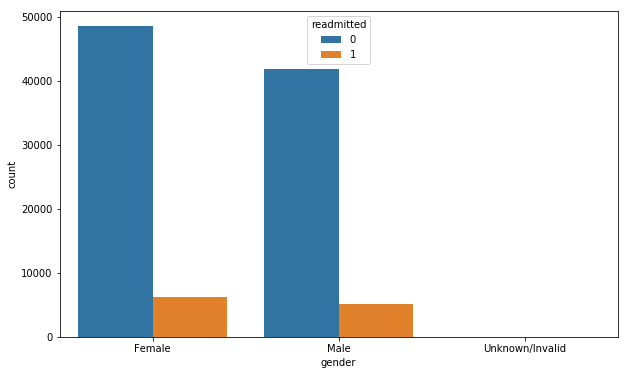

                 %age belonging to class 1
Female                           11.245156
Male                             11.061524
Unknown/Invalid                   0.000000
                 Total observations  %age of total data
Female                        54708           53.758623
Male                          47055           46.238429
Unknown/Invalid                   3            0.002948


In [198]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="gender", hue="readmitted", data=df)
plt.show()
print(category_ratio('gender'))
print(val_counts(df,'gender'))

**Both male and female have almost same occurence with almost same chances of readmission**

### 'age'

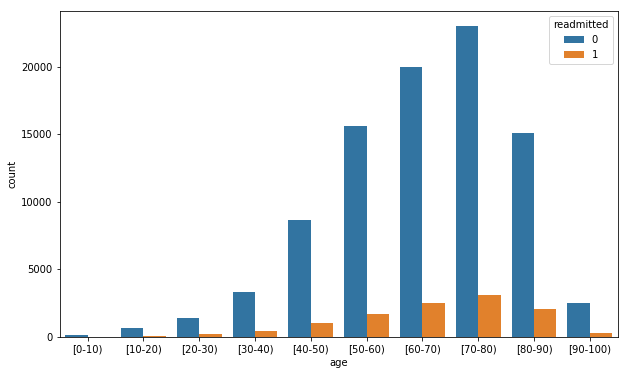

          %age belonging to class 1
[20-30)                   14.242607
[80-90)                   12.083503
[70-80)                   11.773055
[30-40)                   11.231788
[60-70)                   11.128408
[90-100)                  11.099177
[40-50)                   10.604027
[50-60)                    9.666203
[10-20)                    5.788712
[0-10)                     1.863354
          Total observations  %age of total data
[70-80)                26068           25.615628
[60-70)                22483           22.092840
[50-60)                17256           16.956547
[80-90)                17197           16.898571
[40-50)                 9685            9.516931
[30-40)                 3775            3.709490
[90-100)                2793            2.744532
[20-30)                 1657            1.628245
[10-20)                  691            0.679009
[0-10)                   161            0.158206


In [199]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="age", hue="readmitted", data=df)
plt.show()
print(category_ratio('age'))
print(val_counts(df,'age'))

**Observation:**
* As expected, senior citizen patients have the highest encounter in the hospitals.
* Chances of readmission is more in the age group 20-30.
* I will convert them into numerical valaue by taking median age for all the categories.

### 'race'

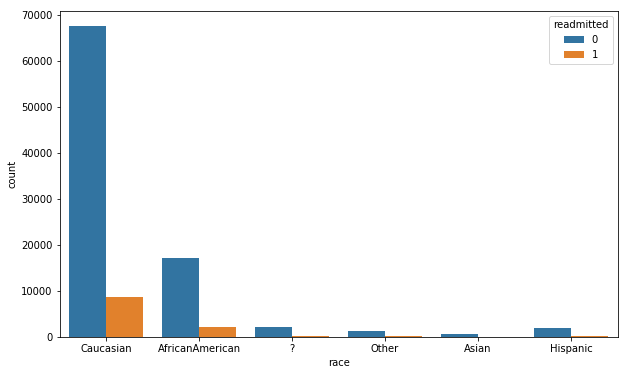

                 %age belonging to class 1
Caucasian                        11.290556
AfricanAmerican                  11.218116
Hispanic                         10.407462
Asian                            10.140406
Other                             9.628154
?                                 8.271007
                 Total observations  %age of total data
Caucasian                     76099           74.778413
AfricanAmerican               19210           18.876639
?                              2273            2.233555
Hispanic                       2037            2.001651
Other                          1506            1.479866
Asian                           641            0.629876


In [200]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="race", hue="readmitted", data=df)
plt.show()
print(category_ratio('race'))
print(val_counts(df,'race'))

**Observataion:**
1. As we can see, people of race 'Caucasian' has most number of encounters in hospitals.
2. Also, the chances of readmittance is more (11.29%) if the patient is from 'Caucasian' race.

### 'admission_type_id'

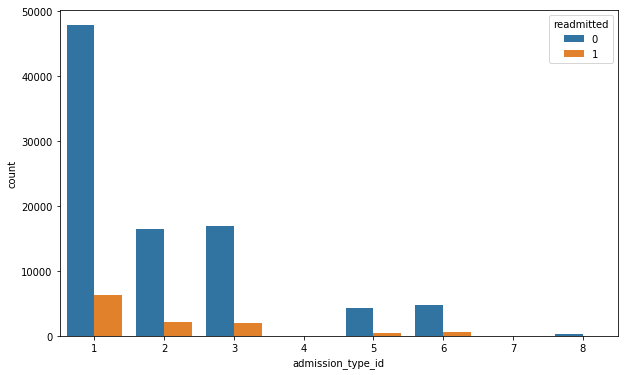

   %age belonging to class 1
1                  11.522504
2                  11.179654
6                  11.075411
3                  10.392708
5                  10.344828
4                  10.000000
8                   8.437500
7                   0.000000
   Total observations
1               53990
3               18869
2               18480
6                5291
5                4785
8                 320
7                  21
4                  10


In [84]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="admission_type_id", hue="readmitted", data=df)
plt.show()
print(category_ratio('admission_type_id'))
print(val_counts(df,'admission_type_id'))

In [63]:
print(df_id[df_id['admission_type_id'] == '1'])
print('='*100)
print(df_id[df_id['admission_type_id'] == '2'])
print('='*100)
print(df_id[df_id['admission_type_id'] == '6'])

   admission_type_id          description
0                  1            Emergency
10                 1   Discharged to home
42                 1   Physician Referral
   admission_type_id                                        description
1                  2                                             Urgent
11                 2  Discharged/transferred to another short term h...
43                 2                                    Clinic Referral
   admission_type_id                                        description
5                  6                                                NaN
15                 6  Discharged/transferred to home with home healt...
47                 6         Transfer from another health care facility


**Observation:**
1. 'admission_type_id' = 1, which is 
    * Emergency
    * Discharged to home
    * Physician Referral
    has most of the encounters (more than 50%).
2. Also the chances of readmittance is more if the patient has admission type 1 as compared to other admission type.
3. admission type 2 and 3 have also a lot of encounters but chances of readmittance is more when the admission type is 6 than 3.

### 'admission_source_id'


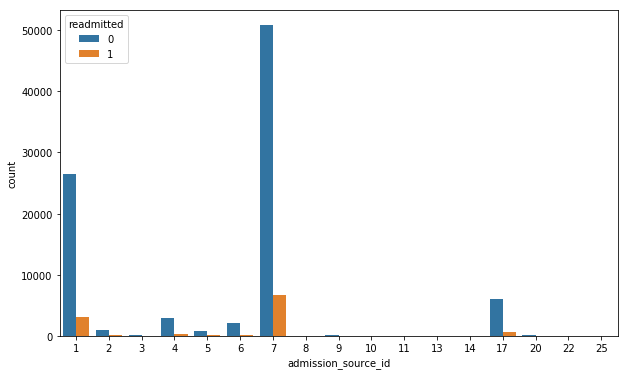

    %age belonging to class 1
22                  16.666667
3                   15.508021
20                  13.664596
8                   12.500000
5                   11.812865
7                   11.688176
1                   10.586843
17                  10.411444
9                   10.400000
2                   10.054348
4                    9.695639
6                    9.363958
14                   0.000000
10                   0.000000
11                   0.000000
25                   0.000000
13                   0.000000
    Total observations
7                57494
1                29565
17                6781
4                 3187
6                 2264
2                 1104
5                  855
3                  187
20                 161
9                  125
8                   16
22                  12
10                   8
14                   2
11                   2
25                   2
13                   1


In [85]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="admission_source_id", hue="readmitted", data=df)
plt.show()
print(category_ratio('admission_source_id'))
print(val_counts(df,'admission_source_id'))

**Observations:**
* 'admission_source_id' 7 has the majority of the encounters followed by ID 1.


### 'discharge_disposition_id'

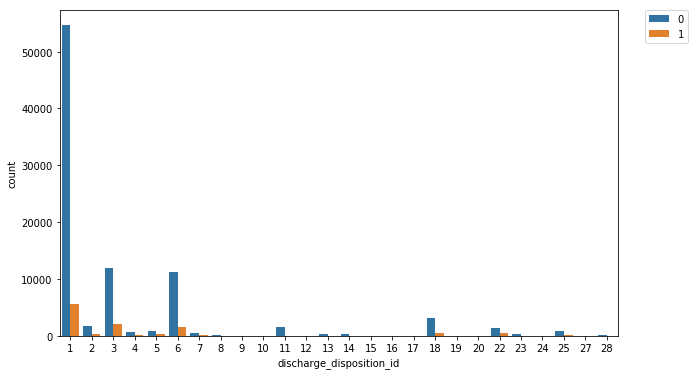

    %age belonging to class 1
12                  66.666667
15                  44.444444
9                   42.857143
28                  36.690647
22                  27.696939
5                   20.861486
2                   16.071429
3                   14.662462
24                  14.583333
7                   14.446228
8                   13.888889
4                   12.760736
6                   12.695706
18                  12.435654
25                   9.302326
1                    9.300395
23                   7.281553
14                   6.451613
13                   4.761905
17                   0.000000
20                   0.000000
16                   0.000000
10                   0.000000
11                   0.000000
19                   0.000000
27                   0.000000
    Total observations  %age of total data
1                60234           59.188727
3                13954           13.711849
6                12902           12.678105
18                

In [203]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="discharge_disposition_id", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('discharge_disposition_id'))
print(val_counts(df,'discharge_disposition_id'))

**A lot of IDs have very few observations, almost zero. At the same time IDs 1,3,6 has a good amount of observations**

### 'time_in_hospital'

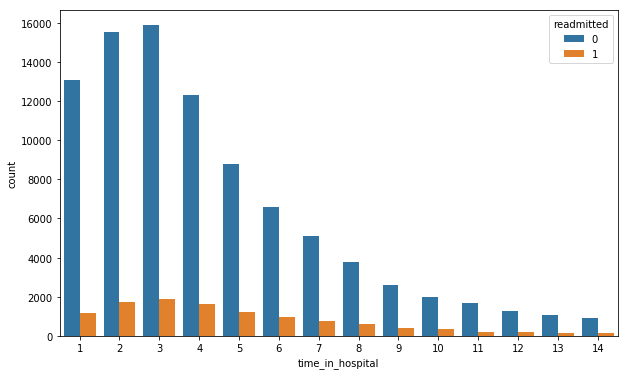

    %age belonging to class 1
10                  14.346712
8                   14.233660
9                   13.724184
12                  13.328729
14                  12.955854
7                   12.834955
6                   12.587876
13                  12.314050
5                   12.030905
4                   11.806952
3                   10.666817
11                  10.512129
2                    9.939619
1                    8.178491


In [67]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="time_in_hospital", hue="readmitted", data=df)
plt.show()
print(category_ratio('time_in_hospital'))

**If we look at top 5 categories of days which has highest chance of readmittance, we see 10,8,9,12 & 14 which is quite intuitive because more time spent in hospital means more severe was the condition.**
**If we look at the bottom 5 categories of days which has lowest chance of readmittance, we see 4,3,11,2 & 1 which is also explanable. But these IDs have majority of the observations**


### 'payer_code'

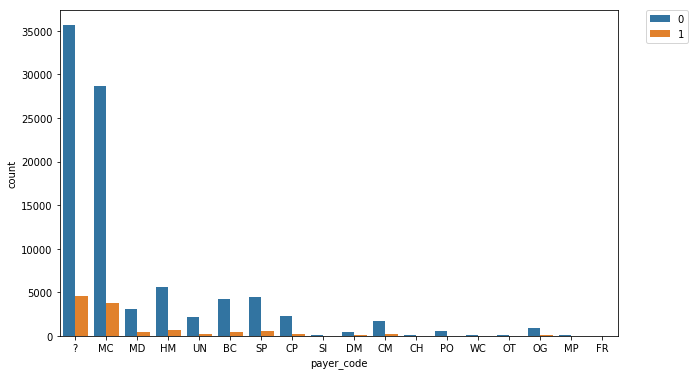

    %age belonging to class 1
OG                  13.165537
SI                  12.727273
MD                  11.778029
MC                  11.745122
DM                  11.657559
?                   11.493939
MP                  11.392405
HM                  10.264584
CM                  10.221993
SP                  10.185740
UN                   9.272876
BC                   9.151450
CH                   8.904110
CP                   8.448480
PO                   7.432432
OT                   7.368421
WC                   3.703704
FR                   0.000000


In [69]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="payer_code", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('payer_code'))

**Majority of the observations have no record about payer_code.**
**payer_code, MC, has most of the observations after null values observations**

### 'medical_specialty'

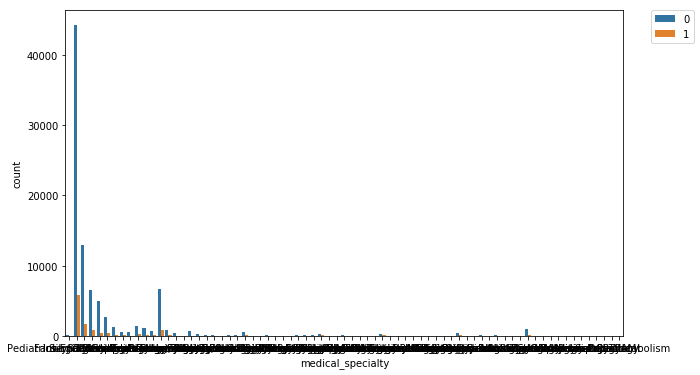

                                %age belonging to class 1
Resident                                        50.000000
AllergyandImmunology                            42.857143
Hematology                                      31.707317
Pediatrics-Hematology-Oncology                  25.000000
InfectiousDiseases                              21.621622
...                                                   ...
Pediatrics-EmergencyMedicine                     0.000000
Proctology                                       0.000000
Pediatrics-InfectiousDiseases                    0.000000
Psychiatry-Addictive                             0.000000
Dermatology                                      0.000000

[73 rows x 1 columns]
                               Total observations
?                                           49949
InternalMedicine                            14635
Emergency/Trauma                             7565
Family/GeneralPractice                       7440
Cardiology                     

In [75]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="medical_specialty", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('medical_specialty'))

print(val_counts(df,'medical_specialty'))

**Observations:**
* As we can see majority of the observations have missing value for medical_specialty. 
* Apart from that, InternalMedicine has the majority of the observations.
* Resident class has the highest chance of readmittance (50%) followed by Hematology.
* But most of the classes have very very few observations.

### 'number_diagnoses'

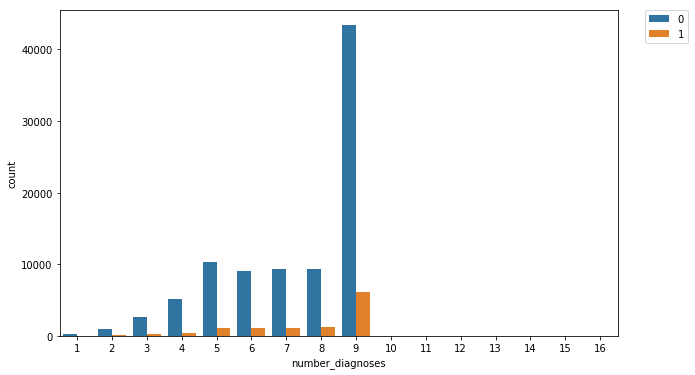

    %age belonging to class 1
11                  27.272727
15                  20.000000
13                  18.750000
10                  17.647059
14                  14.285714
9                   12.380240
8                   11.812359
12                  11.111111
7                   10.766862
6                   10.412361
5                    9.154744
16                   8.888889
4                    8.253567
3                    7.372134
2                    6.060606
1                    5.936073
    Total observations
9                49474
5                11393
8                10616
7                10393
6                10161
4                 5537
3                 2835
2                 1023
1                  219
16                  45
10                  17
13                  16
11                  11
15                  10
12                   9
14                   7


In [76]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="number_diagnoses", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_diagnoses'))
print(val_counts(df,'number_diagnoses'))

**Observations:**
* Majority of the patients have gone through total 9 diagnosis .
* The chances of readmittance seems slightly more if you go for more number of diagnosis.

### 'max_glu_serum'

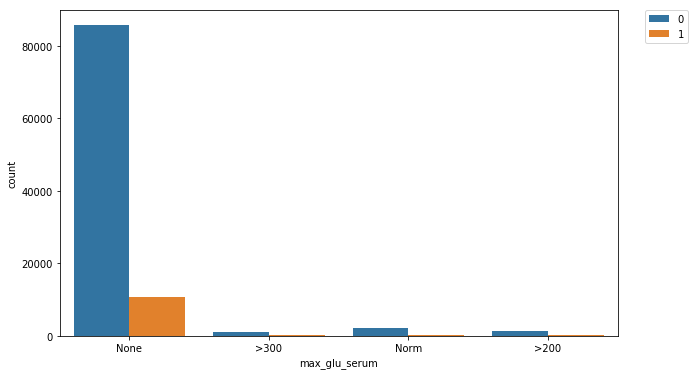

      %age belonging to class 1
>300                  14.319620
>200                  12.457912
Norm                  11.359261
None                  11.093134
      Total observations
None               96420
Norm                2597
>200                1485
>300                1264


In [77]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="max_glu_serum", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('max_glu_serum'))
print(val_counts(df,'max_glu_serum'))

**Observation:**
* If the 'max_glu_serum' test result is >300, then the chance of readmittance is highest followed by >200.
* But the difference between chance od readmittance to the case where your glucose level is Normal to that where it is >300 is not that significant (it is just around 3%).
* Majority of the patients have not gone through this test. 

### 'A1Cresult'

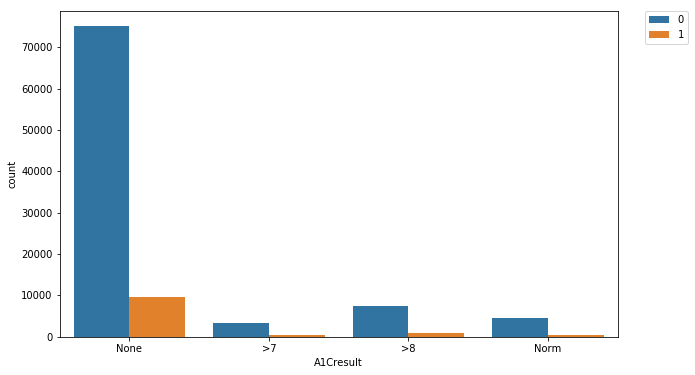

      %age belonging to class 1
None                  11.423278
>7                    10.047219
>8                     9.870983
Norm                   9.659319
      Total observations
None               84748
>8                  8216
Norm                4990
>7                  3812


In [78]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="A1Cresult", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('A1Cresult'))
print(val_counts(df,'A1Cresult'))

**Observation:**
* Chances of readmittance seems slightly more if patient does not under go this test.
* But the difference between chances of readmittance in all the 4 cases is not that significant.
* Majority of the patients have not gone through this test. 

### 'change'

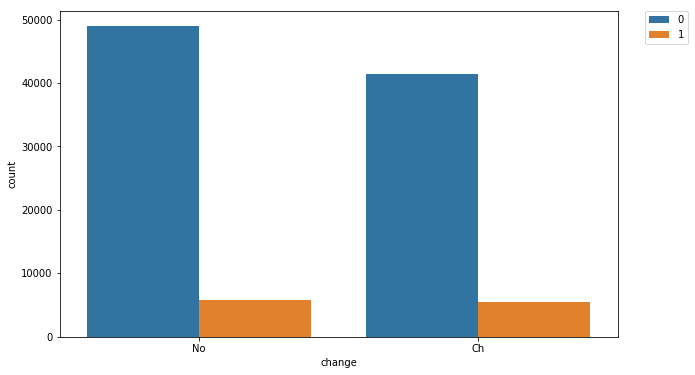

    %age belonging to class 1
Ch                  11.822765
No                  10.590814
    Total observations
No               54755
Ch               47011


In [79]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="change", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('change'))
print(val_counts(df,'change'))

**If one goes medication change then chance of readmission is just slighlty more else this seems perfectly balanced feature almost balanced patient in both categories**

### 'num_lab_procedures'

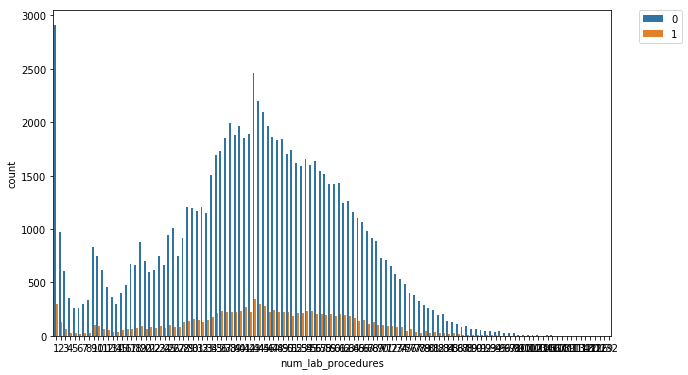

     %age belonging to class 1
132                 100.000000
105                  33.333333
109                  25.000000
108                  25.000000
106                  20.000000
..                         ...
129                   0.000000
102                   0.000000
113                   0.000000
114                   0.000000
118                   0.000000

[118 rows x 1 columns]
     Total observations
1                  3208
43                 2804
44                 2496
45                 2376
38                 2213
..                  ...
120                   1
132                   1
121                   1
126                   1
118                   1

[118 rows x 1 columns]


In [87]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="num_lab_procedures", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('num_lab_procedures'))
print(val_counts(df,'num_lab_procedures'))

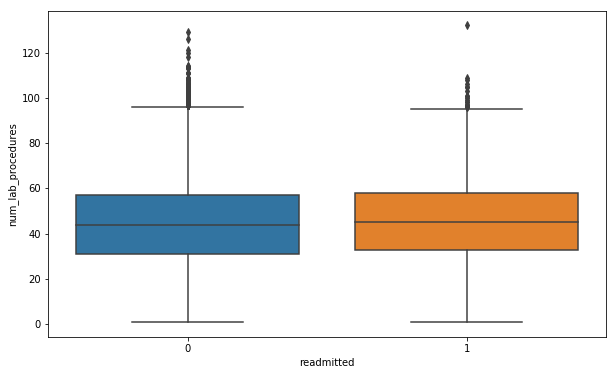

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'num_lab_procedures',data=df)


**Observations:**
* More outliers when there is not readmission.
* Box plot almost coincides so not much help from here.

### 'num_procedures'

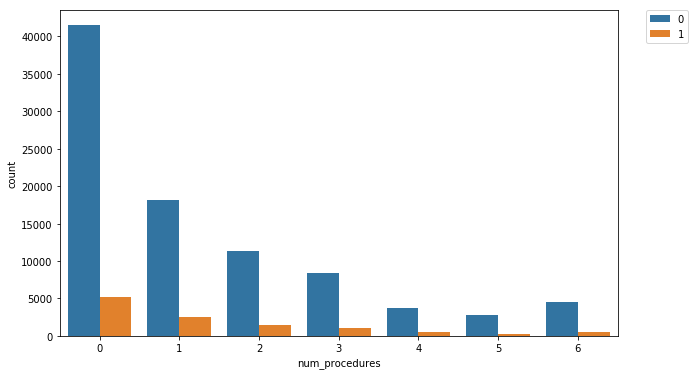

   %age belonging to class 1
1                  12.207116
2                  11.181883
0                  11.077767
4                  11.028708
3                  10.685164
6                   9.588212
5                   9.421702
   Total observations
0               46652
1               20742
2               12717
3                9443
6                4954
4                4180
5                3078


In [86]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="num_procedures", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('num_procedures'))
print(val_counts(df,'num_procedures'))

**Most of the patients have not gone through any extra test other than lab tests because num_procedures indicates number of procedures other than lab procedures.**
**It seems that patients with more num of procedures other than lab procedures have lesser chances of readmission.**

### 'num_medications'

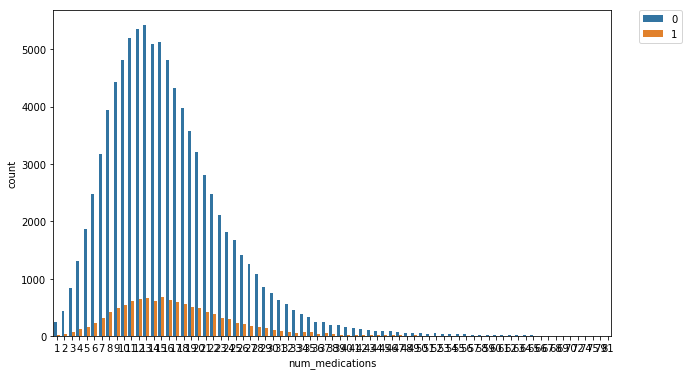

    %age belonging to class 1
81                 100.000000
72                 100.000000
70                  50.000000
68                  28.571429
67                  28.571429
..                        ...
66                   0.000000
69                   0.000000
79                   0.000000
75                   0.000000
74                   0.000000

[75 rows x 1 columns]
    Total observations
13                6086
12                6004
11                5795
15                5792
14                5707
..                 ...
70                   2
75                   2
81                   1
79                   1
74                   1

[75 rows x 1 columns]


In [88]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="num_medications", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('num_medications'))
print(val_counts(df,'num_medications'))

**'num_medications' seems right skewed and so does the chance of getting readmission.** 

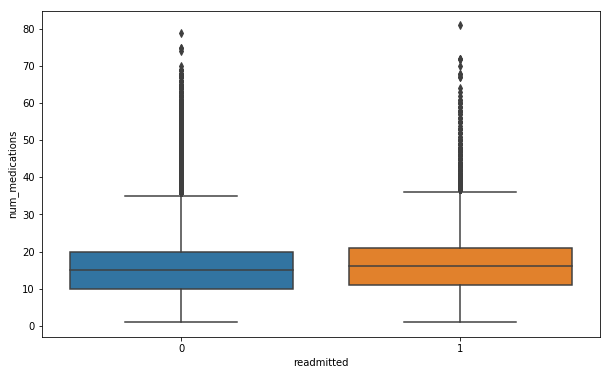

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'num_medications',data=df)


**As we can clearly see, a lot of outliers are present in this feature.**
**The boxplot nearly coincides for both readmission and non-readmission so not much usefull info**

### 'number_outpatient'

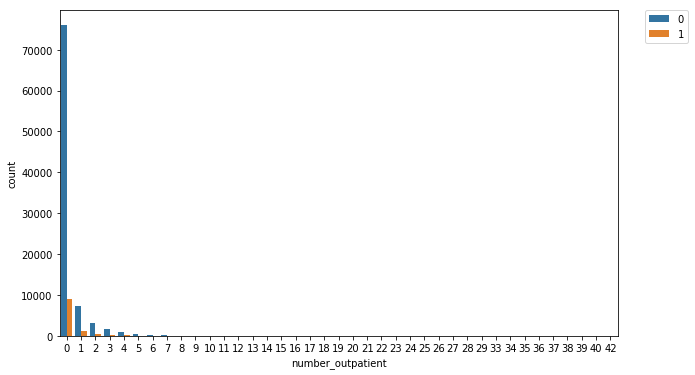

    %age belonging to class 1
40                 100.000000
23                  50.000000
19                  33.333333
22                  20.000000
12                  20.000000
13                  19.354839
14                  17.857143
9                   15.662651
7                   15.483871
4                   15.104641
11                  14.285714
1                   13.923014
2                   13.745131
6                   13.201320
17                  12.500000
3                   12.291871
5                   11.819887
0                   10.674256
15                  10.000000
10                   8.771930
8                    5.102041
21                   0.000000
34                   0.000000
38                   0.000000
37                   0.000000
28                   0.000000
25                   0.000000
33                   0.000000
26                   0.000000
42                   0.000000
39                   0.000000
16                   0.000000
24        

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="number_outpatient", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_outpatient'))
print(val_counts(df,'number_outpatient'))

**Majority of the patients have not gone any outpatient encounters prior to going inpatient.**
**As the number of outpatients is increasing the encouters drops very fast**

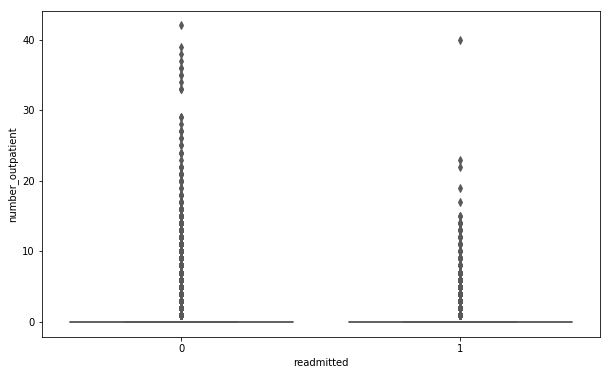

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'number_outpatient',data=df,palette="Set2")


**Majority of the points are outliers and boxplot does not help here**

### 'number_emergency'

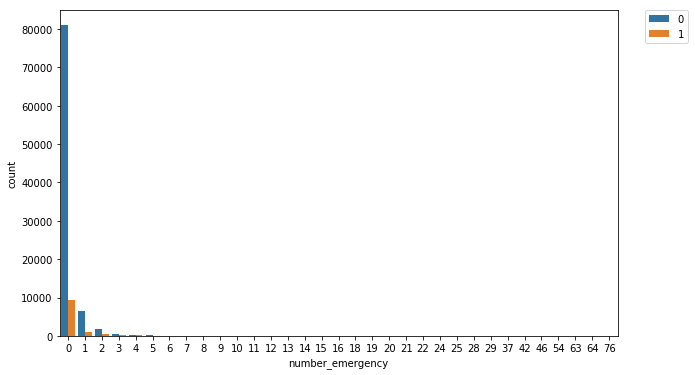

    %age belonging to class 1
64                 100.000000
28                 100.000000
20                  50.000000
22                  50.000000
21                  50.000000
19                  50.000000
16                  40.000000
9                   36.363636
10                  35.294118
15                  33.333333
13                  33.333333
8                   32.000000
4                   30.748663
7                   26.027397
5                   24.479167
6                   23.404255
11                  21.739130
3                   20.275862
18                  20.000000
12                  20.000000
2                   18.266405
1                   14.354566
0                   10.474315
14                   0.000000
42                   0.000000
46                   0.000000
76                   0.000000
37                   0.000000
25                   0.000000
63                   0.000000
54                   0.000000
24                   0.000000
29        

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="number_emergency", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_emergency'))
print(val_counts(df,'number_emergency'))

**Most of the patients have no 0 emergency visits in hospitals prior to admission**

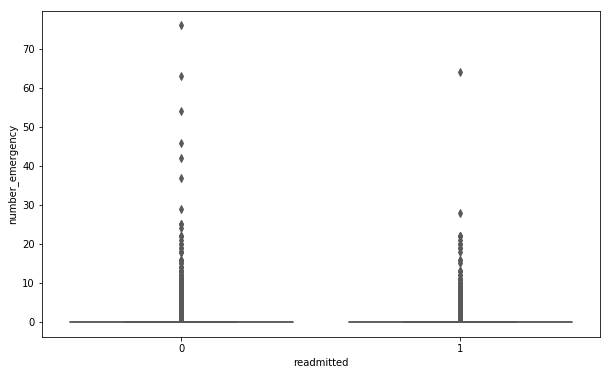

In [25]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'number_emergency',data=df,palette="Set2")


**Majority of the points are outliers and boxplot does not help here**

### 'number_inpatient'

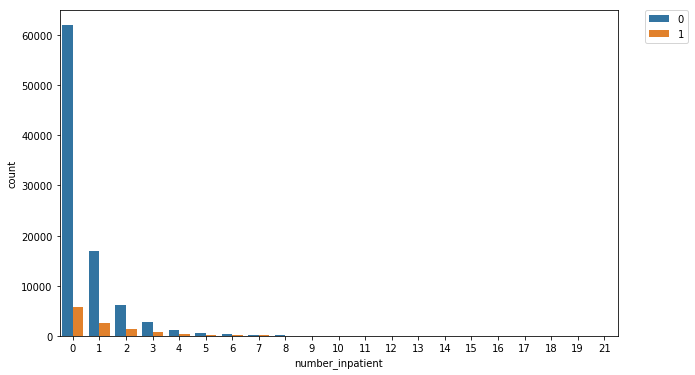

    %age belonging to class 1
15                 100.000000
21                 100.000000
17                 100.000000
11                  67.346939
13                  50.000000
12                  50.000000
19                  50.000000
8                   44.370861
10                  42.622951
9                   42.342342
14                  40.000000
7                   35.447761
6                   34.583333
16                  33.333333
5                   31.403941
4                   23.612824
3                   20.287306
2                   17.433254
1                   12.924543
0                    8.437084
18                   0.000000
    Total observations
0                67630
1                19521
2                 7566
3                 3411
4                 1622
5                  812
6                  480
7                  268
8                  151
9                  111
10                  61
11                  49
12                  34
13                

In [26]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="number_inpatient", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('number_inpatient'))
print(val_counts(df,'number_inpatient'))

**Majority of the patients have not gone any inpatient encounters in the year preceding the encounter. As the number of inpatients is increasing total encouters drop very fast**  
**Also patients with high num of inpatient have high chanaces of readmission**

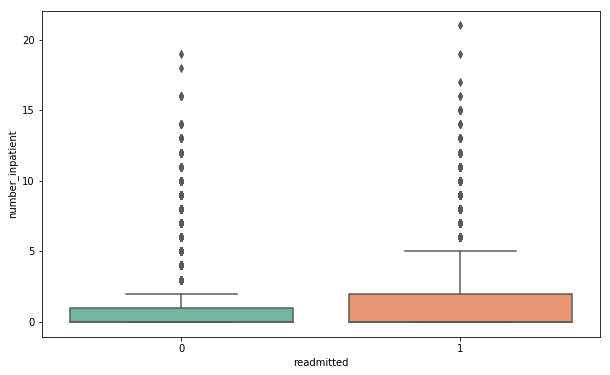

In [27]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y = 'number_inpatient',data=df,palette="Set2")


**This seems to be a useful featture, as number of inpatients increases the chances of readmission is more**

### 'diag_1'

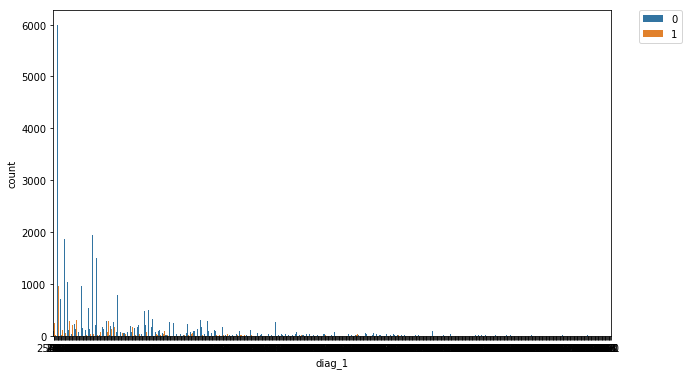

     %age belonging to class 1
543                      100.0
347                      100.0
391                      100.0
299                      100.0
904                      100.0
..                         ...
991                        0.0
229                        0.0
939                        0.0
686                        0.0
V51                        0.0

[717 rows x 1 columns]
     Total observations
428                6862
414                6581
786                4016
410                3614
486                3508
..                  ...
373                   1
314                   1
684                   1
217                   1
V51                   1

[717 rows x 1 columns]


In [28]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diag_1", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diag_1'))
print(val_counts(df,'diag_1'))

**Observataions:**
* Primary diagnosis 428 (ICD code) is the most frequent one followed by 414.
* There are too many unique ICD codes and hence the plot is not clear.

### 'diag_2'

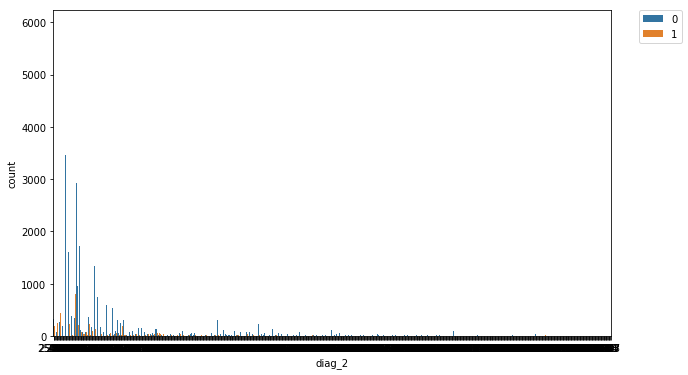

        %age belonging to class 1
250.31                      100.0
364                         100.0
186                         100.0
114                         100.0
975                         100.0
...                           ...
519                           0.0
239                           0.0
906                           0.0
945                           0.0
927                           0.0

[749 rows x 1 columns]
      Total observations
276                 6752
428                 6662
250                 6071
427                 5036
401                 3736
...                  ...
E918                   1
46                     1
V13                    1
E850                   1
927                    1

[749 rows x 1 columns]


In [41]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diag_2", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diag_2'))
print(val_counts(df,'diag_2'))

**Observations:**
* Secondary diagnosis 276 (ICD code) is the most frequent one followed by 428.
* There are 749 unique ICD codes and hence the plot is not clear.

### 'diag_3'

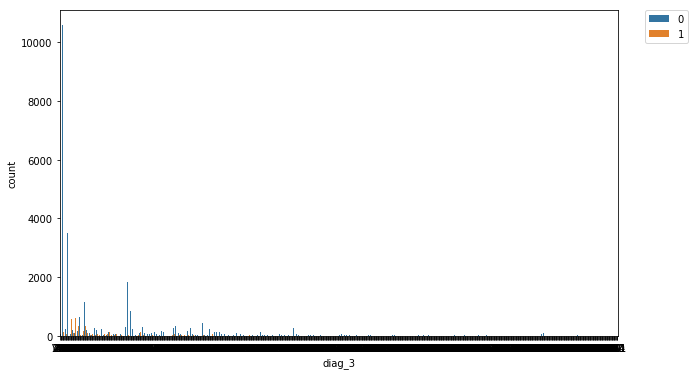

        %age belonging to class 1
744                         100.0
E876                        100.0
111                         100.0
365.44                      100.0
215                         100.0
...                           ...
359                           0.0
360                           0.0
V25                           0.0
180                           0.0
971                           0.0

[790 rows x 1 columns]
      Total observations
250                11555
401                 8289
276                 5175
428                 4577
427                 3955
...                  ...
657                    1
684                    1
603                    1
E826                   1
971                    1

[790 rows x 1 columns]


In [16]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diag_3", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diag_3'))
print(val_counts(df,'diag_3'))

**Observations:**
* Secondary diagnosis 276 (ICD code) is the most frequent one followed by 428.
* There are 749 unique ICD codes and hence the plot is not clear.

## Medicines

In [42]:
def multi_plot(features,df):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize = (20,20) )
    index = 0
    for i in range(3):
        for j in range(3):
            sns.countplot(x=features[index], hue="readmitted", data=df, ax=axs[i,j],palette="rocket")
            index += 1
l1 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide']
l2 = ['miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone']
l3 = ['metformin-rosiglitazone','metformin-pioglitazone' , 'pioglitazone', 'rosiglitazone', 'acarbose']



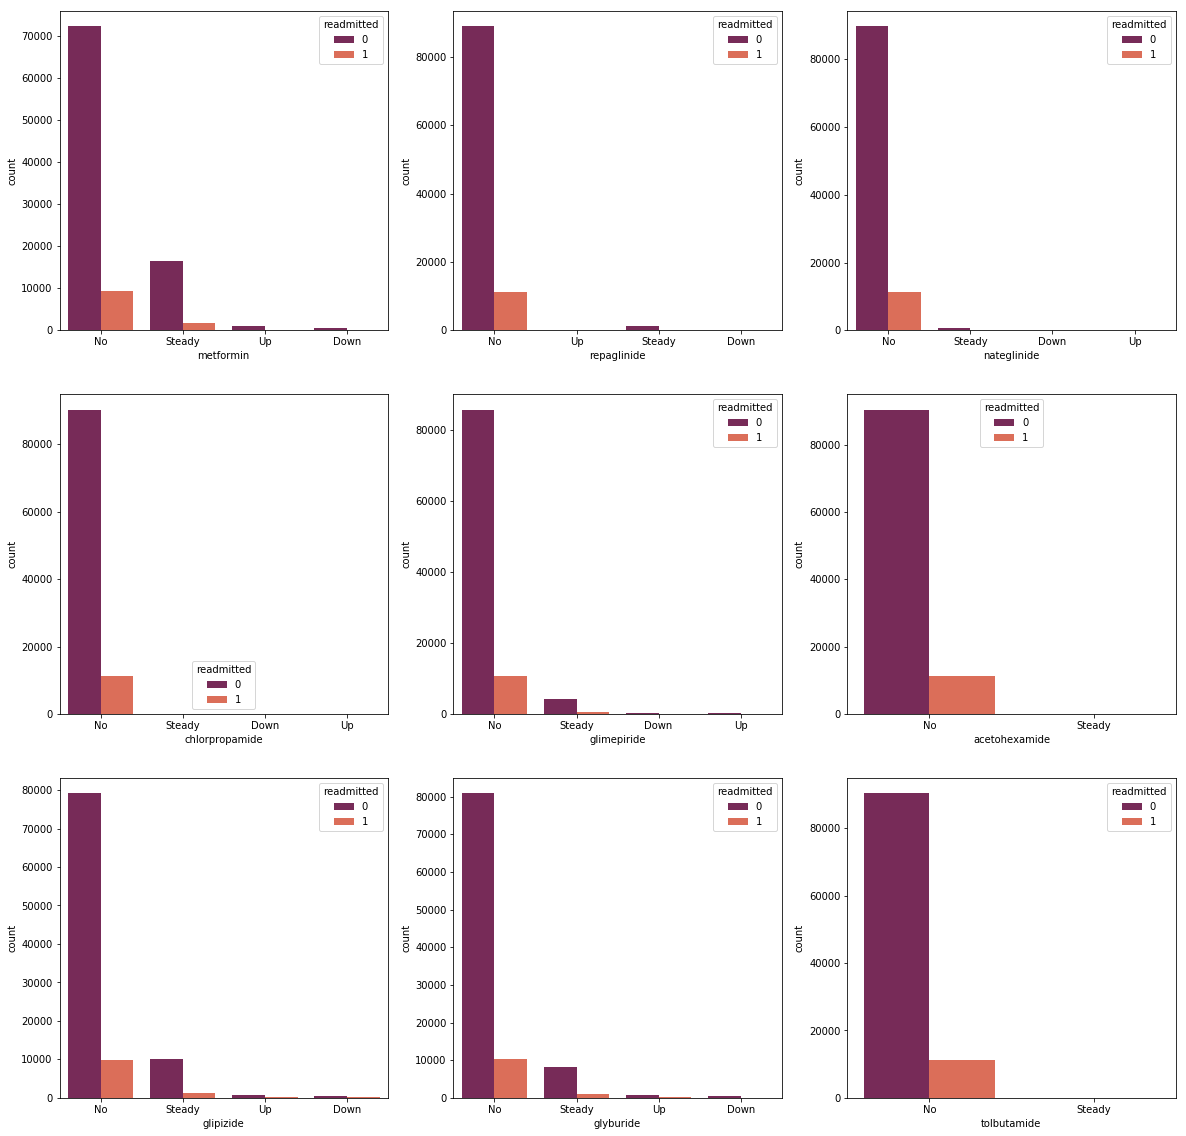

In [43]:
multi_plot(l1,df)

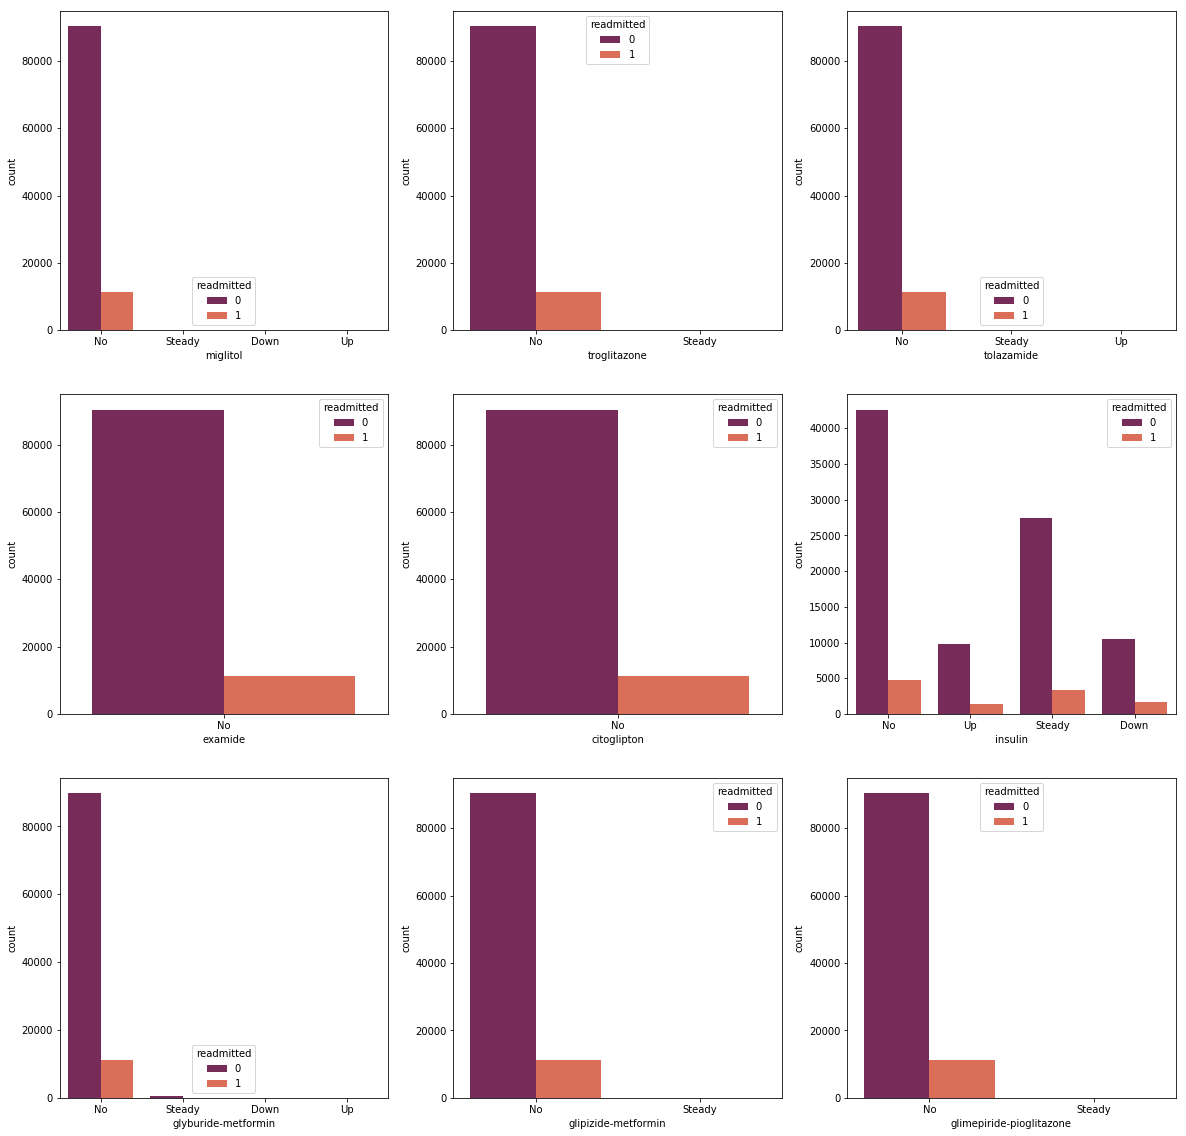

In [44]:
multi_plot(l2,df)

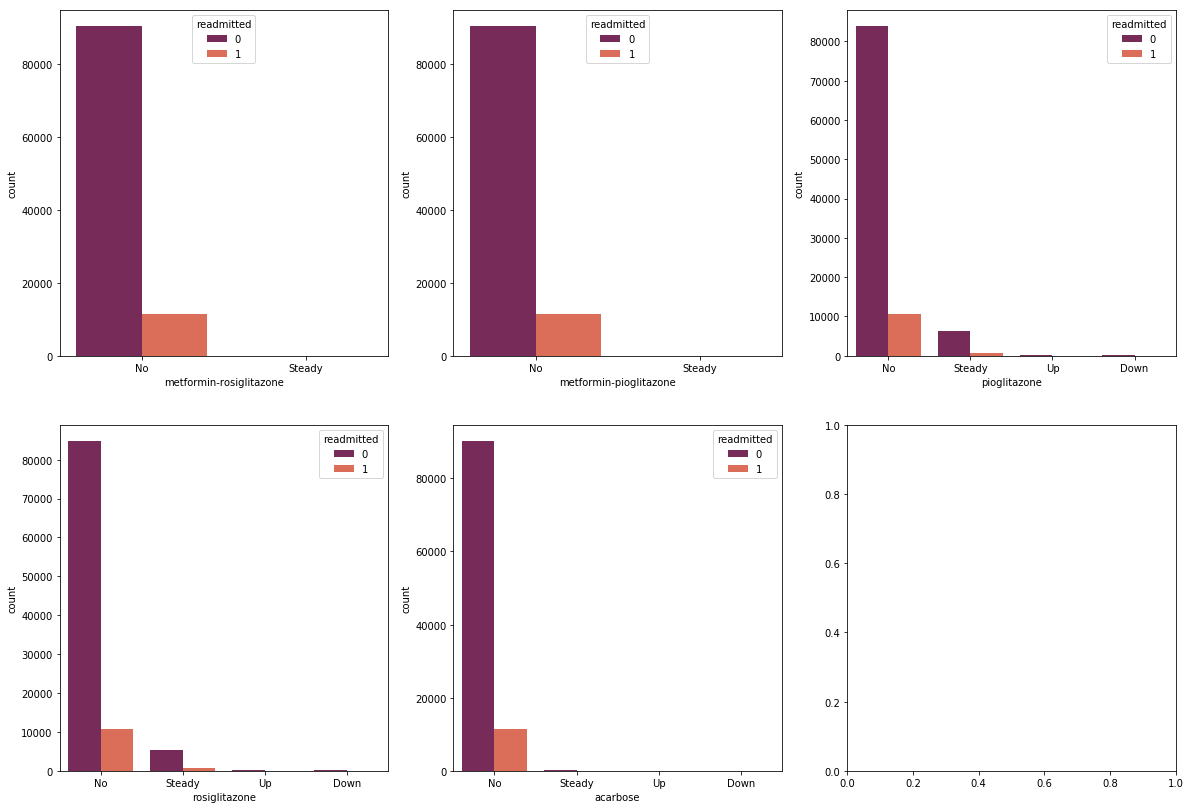

In [48]:
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize = (20,14) )
index = 0

for i in range(2):
    for j in range(3):
        try:
            sns.countplot(x=l3[index], hue="readmitted", data=df, ax=axs[i,j],palette="rocket")
            index += 1
        except IndexError:
            print('')
           
        

**Observations:**
* Medicines which were not prescribed to any patients: *metformin-pioglitazone, metformin-rosiglitazone, glimepiride-pioglitazone, glipizide-metformin, examide, citoglipton, acetohexamide, tolbutamide*
* we can see from here that all the medicines have most of the encounters where they were not prescribed to patients.
* Then the 2nd most frequent status of medicine  is 'Steady'.

In [128]:
def plot_med_stat(status):
    l = l1 + l2 + l3
    
    dic = {}
    explode = []
    for med in l:
        if len(df[df[med]==status]) > 100:
            dic[med] = len(df[df[med]==status])
            explode.append(0.2)
    print(pd.DataFrame.from_dict(dic,orient='index',columns=['total']).sort_values(by=['total']))

    plt.figure(figsize =(10,10))
    plt.pie(dic.values(),labels=dic.keys(),explode = explode, shadow=True, rotatelabels=True,autopct='%1.1f%%')
    plt.legend(title="Medicine names",loc="best",bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()


               total
repaglinide      110
rosiglitazone    178
pioglitazone     234
glimepiride      327
glipizide        770
glyburide        812
metformin       1067
insulin        11316


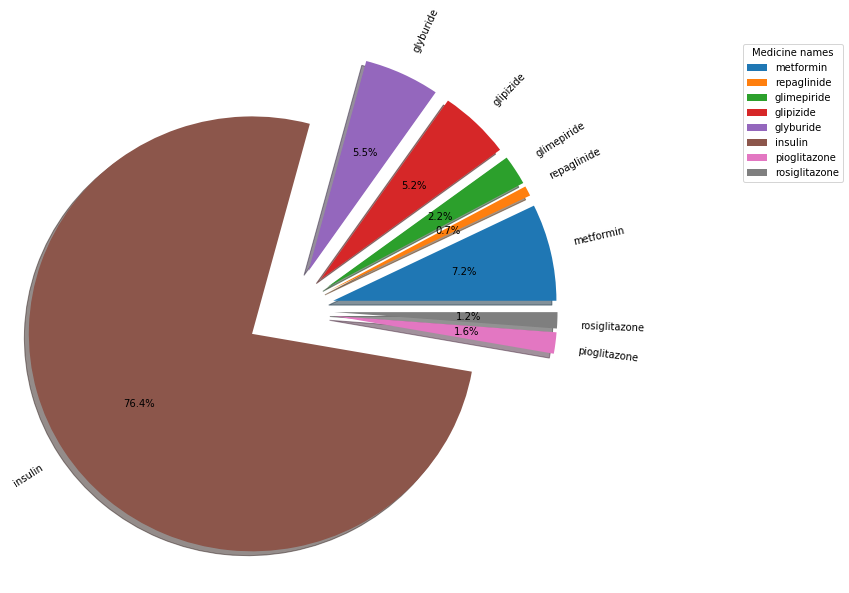

In [129]:
plot_med_stat('Up')

**This plot only considers medicine with at least 100 cases of upgradation. Clearly, of all the encounters where dosage were increased, Inuslin has the majority of the cases (76.1%), followed by Metformin. There are many medicines whose dosage were not increased, not even in a single case.** 

              total
pioglitazone    118
glimepiride     194
glipizide       560
glyburide       564
metformin       575
insulin       12218


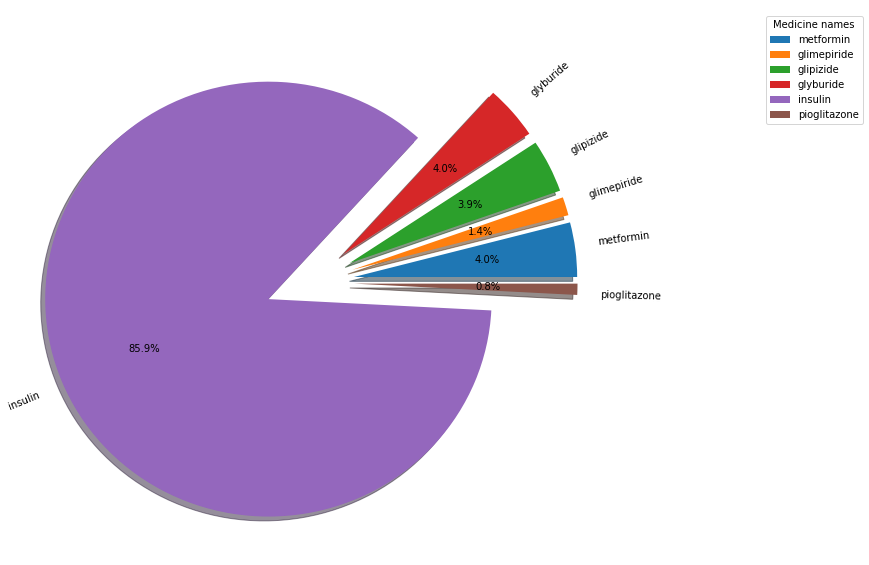

In [130]:
plot_med_stat('Down')

**This plot only considers medicine with at least 100 cases of dosage reduction. Of all the encounters where dosage were reduced, Inuslin has the majority of the cases (85.9%), followed by Metformin, glyburide and then glipizide.**

                     total
acarbose               295
nateglinide            668
glyburide-metformin    692
repaglinide           1384
glimepiride           4670
rosiglitazone         6100
pioglitazone          6976
glyburide             9274
glipizide            11356
metformin            18346
insulin              30849


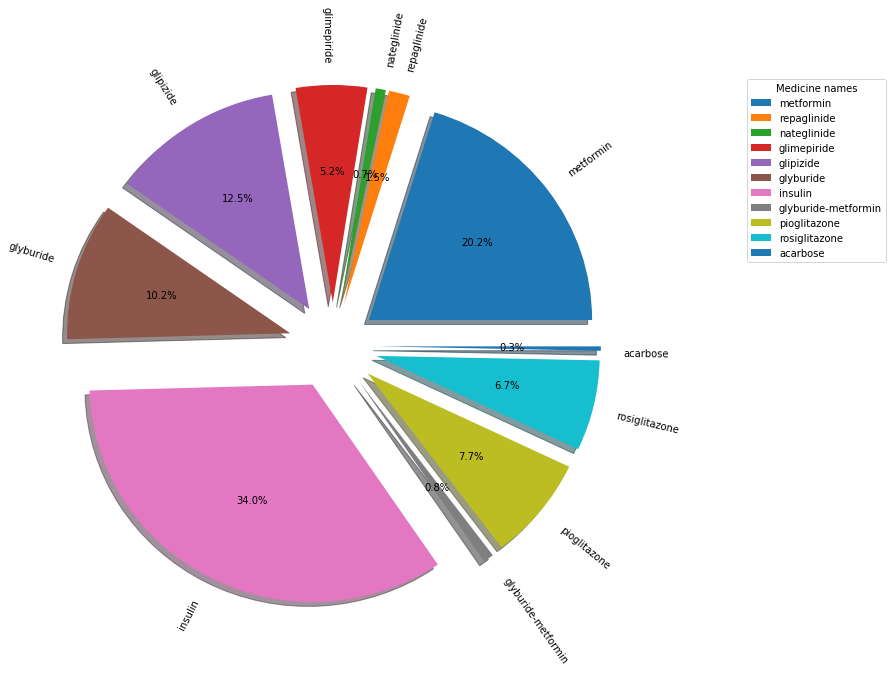

In [131]:
plot_med_stat('Steady')

**Again in cases where medicine was kept steady, insulin (34%) had the majority cases followed by metformin (20.2%), glipizide (12.5%) then glyburide (10.2%). **

                           total
insulin                    47383
metformin                  81778
glipizide                  89080
glyburide                  91116
pioglitazone               94438
rosiglitazone              95401
glimepiride                96575
repaglinide               100227
glyburide-metformin       101060
nateglinide               101063
acarbose                  101458
chlorpropamide            101680
tolazamide                101727
miglitol                  101728
tolbutamide               101743
glipizide-metformin       101753
troglitazone              101763
metformin-rosiglitazone   101764
acetohexamide             101765
glimepiride-pioglitazone  101765
metformin-pioglitazone    101765
examide                   101766
citoglipton               101766


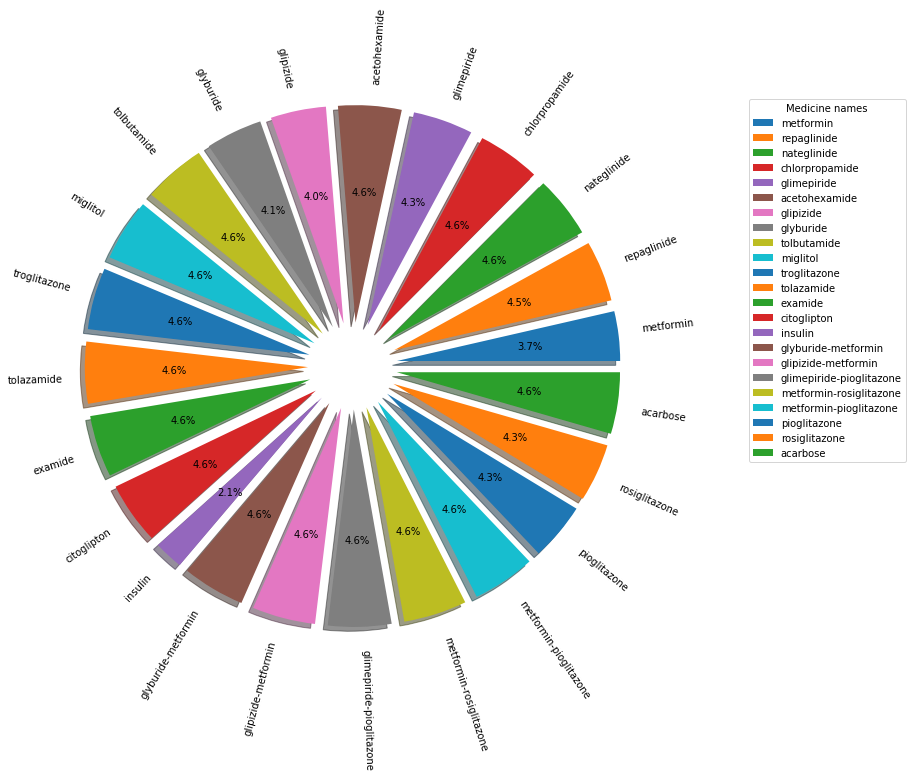

In [132]:
plot_med_stat('No')

**Almost all the medicines faced same number of cases where they were not prescribes except a few. Insulin has the lowest cases where it was not prescribed**


**By all the analysis of 23 medicine, we can say that Insulin is the most important medicine feature followed by metformin. So we can use Insulin for some kind of feature engineering**

### 'diabetesMed'

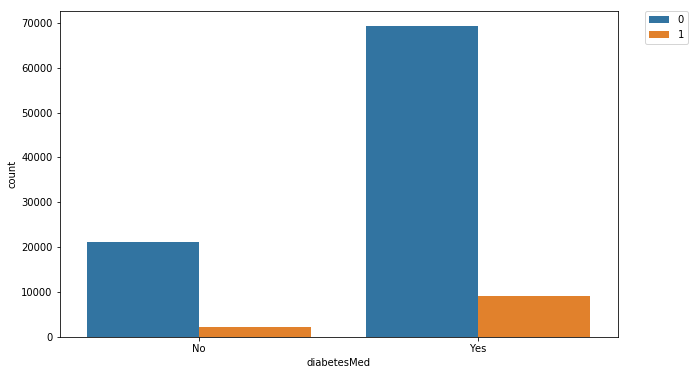

     %age belonging to class 1
Yes                  11.626661
No                    9.597060
     Total observations
Yes               78363
No                23403


In [139]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="diabetesMed", hue="readmitted", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print(category_ratio('diabetesMed'))
print(val_counts(df,'diabetesMed'))

In [195]:
78363/(78363 + 23403)

0.7700312481575379

**Observations:**
* The chances of readmission is slightly higher if the diabetes medication of patient is changed than the case where it is not changed.
* In majority of the cases (77%), diabetes medications was changed.

## Conclusion from EDA:
* Most of the features are not useful directly as there is not a straight forward relationship between a single feature and the label of readmission.
* So I need to do a lot of feature engineering and should look towards creating new features.
* Also, certaian features have many outliers so I should look towards that too.